#  ----------------------------   Estructuración de Redes Sociales  ----------------------

<img src="https://2.bp.blogspot.com/-uwVjNM32AGk/VuVpxEDjr3I/AAAAAAAAOSo/rQK2yPPLon8Olb2qfG0NgrXWLLdd7RLQA/s1600/Panzer_II_AusfC_AK.png" >

# Tarea 1
Developed by [Andrea Sissa](mailto:ap.sissa10@uniandes.edu.co) -- [Jesús Solano](mailto:ja.solano588@uniandes.edu.co) 
version 7.3, Septiembre 29 2018


# Punto 2 $\rightarrow$ Redes de Harry Poter

In [0]:
# Importar librerias necesarias para analizar redes.

import networkx as nx 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pickle 

In [0]:
# Descargar bases de datos.

import os

if not os.path.exists('Edges_libro1_pro.csv'):

  ! wget https://github.com/AndreaSissa/EstructuraRedesSociales/raw/master/Taller1/Punto1/Data/Edges_libro1_pro.csv 
  ! wget https://github.com/AndreaSissa/EstructuraRedesSociales/raw/master/Taller1/Punto1/Data/Edges_libro5_pro.csv 
  ! wget https://github.com/AndreaSissa/EstructuraRedesSociales/raw/master/Taller1/Punto1/Data/Nodos_HarryP_pro.csv 



Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.

Redirecting output to ‘wget-log.2’.


In [0]:
# Leer los nodos y arcos de la red. 

nodesHarry= pd.read_csv('Nodos_HarryP_pro.csv') 
nodesHarry.columns = [c.replace(' ', '') for c in nodesHarry.columns]
print('Los nodos de la red tienen la siguiente informacion: \n',nodesHarry.head(),'\n\n')
edgesHarryBook1=pd.read_csv('Edges_libro1_pro.csv')
print('Los arcos de la red del libro 1 de Harry Potter tienen la siguiente informacion: \n',edgesHarryBook1.head(),'\n\n')
edgesHarryBook5=pd.read_csv('Edges_libro5_pro.csv')
print('Los arcos de la red del libro 5 de Harry Potter tienen la siguiente informacion: \n',edgesHarryBook5.head())


Los nodos de la red tienen la siguiente informacion: 
    Id               Name  Schoolyear  Gender  House   HouseName
0   1       Adrian Pucey        1989       1      4   Slytherin
1   2     Alicia Spinnet        1989       2      1  Gryffindor
2   3   Angelina Johnson        1989       2      1  Gryffindor
3   4  Anthony Goldstein        1991       1      3   Ravenclaw
4   5      Blaise Zabini        1991       1      4   Slytherin 


Los arcos de la red del libro 1 de Harry Potter tienen la siguiente informacion: 
    Source  Target  type
0      11      25     1
1      11      26     1
2      11      44     1
3      11      56     1
4      11      58     1 


Los arcos de la red del libro 5 de Harry Potter tienen la siguiente informacion: 
    Source  Target  type
0       2       3     1
1       2      19     1
2       2      20     1
3       2      25     1
4       2      29     1


¿Cuántos estudiantes entraron a Hogwarts entre 1990 y 1995?

In [0]:
print('El numero de estudiantes que ingresaron entre los años 1990 y 1995 a Hogwarts es: \n'
      , nodesHarry[(nodesHarry['Schoolyear']>=1990) & (nodesHarry['Schoolyear']<=1995)].shape[0])

El numero de estudiantes que ingresaron entre los años 1990 y 1995 a Hogwarts es: 
 48


### Red Libro 1 

In [0]:
# Construccion de la red. 

book1network = nx.DiGraph()

# Iteracion para agregar los nodos de la red. 
for n in range(len(nodesHarry)):
  
  # Carga un nodo tempooral.
  tempNode = nodesHarry['Id'][n]
  
  # Agrega el nodo temporal a la red.
  book1network.add_node(tempNode)
  
  # Anade los atributos a cada nodo.
  book1network.nodes[tempNode]['Name']= nodesHarry['Name'][n]
  book1network.nodes[tempNode]['Gender']= nodesHarry['Gender'][n]
  book1network.nodes[tempNode]['House']= nodesHarry['House'][n]
  book1network.nodes[tempNode]['HouseName']= nodesHarry['HouseName'][n]

# Iteracion para conectar los nodos de la red. 
for e in range(len(edgesHarryBook1)):
  # Busca los nodos conectados.
  sourceNode = edgesHarryBook1['Source'][e]
  targetNode = edgesHarryBook1['Target'][e]
 
  book1network.add_edge(sourceNode,targetNode)
  
  # Anade atributos a cada conexion. 
  book1network.adj[sourceNode][targetNode]['Type'] = edgesHarryBook1['type'][e]

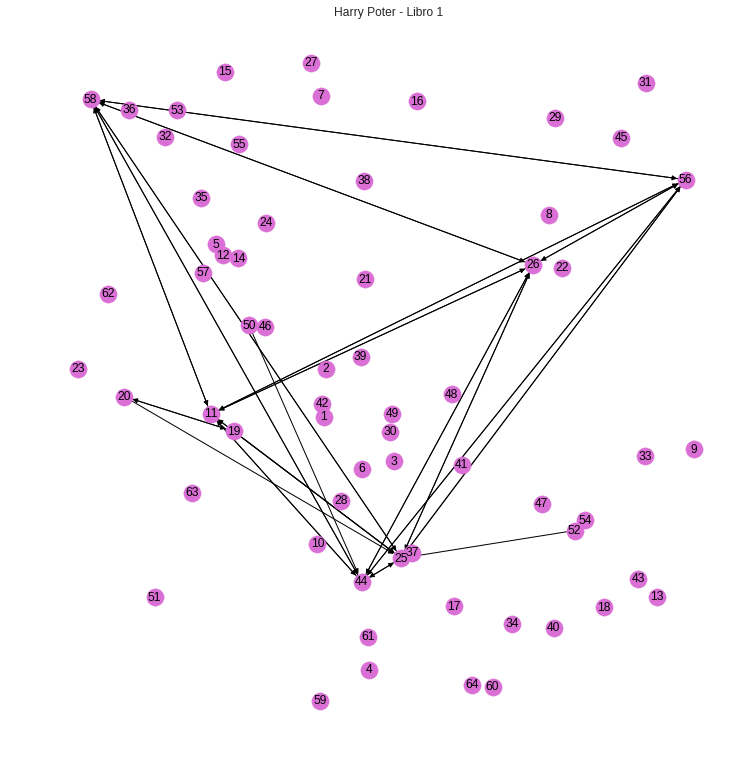

In [0]:
# Dibuja la red asociada al libro.
plt.figure(figsize=(10,10))
nx.draw_random(book1network, with_labels=True, node_color='orchid')
plt.title('Harry Poter - Libro 1')
plt.show()

In [0]:
### Identifica los nodos pertenecientes a cada casa.

# Lectura de todas las posibles casas en Hogwarts.
houseNamesList = list(nodesHarry.HouseName.unique())

# Inicializar los contadores asociados a los subgrafos.
nodesInAHouse = {}
totalNodesInAHouse = {}

for house in houseNamesList:
  nodesInAHouse[house] = []
  totalNodesInAHouse[house] = 0

# Itera para agregar los nodos a sus casas.
for n in book1network.nodes:
  for house in houseNamesList:
    if book1network.nodes[n]['HouseName']==house: 
      nodesInAHouse[house].append(n)
      totalNodesInAHouse[house] += 1
    

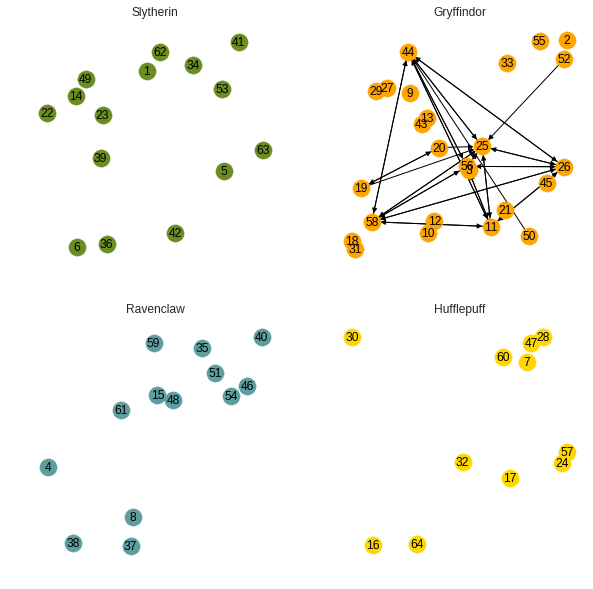

In [0]:
#### Crear subgrafos asociados a cada casa.

houseSubgraph = {}

# Construye los subgrafo de cada casa.
for house in houseNamesList:
  houseSubgraph[house] = book1network.subgraph(nodesInAHouse[house])
  
# Dibuja los subgrafos de cada casa .

subgraphPlot=plt.figure(figsize=(10,10))

# Define colors to graph.


houseColor = { 'Slytherin': 'olivedrab','Gryffindor': 'orange', 'Ravenclaw': 'cadetblue', 'Hufflepuff': 'gold' }
# Iteracion sobre casas.
i=1
for house in houseNamesList:
  plt.subplot(2,2,i)
  nx.draw_random(houseSubgraph[house],node_color=houseColor[house],with_labels=True)
  plt.title(house)
  i+=1

####B. Encontrar a los 5 personajes más conectados de la red por casa ¿Qué se puede interpretar del rol de estos personajes en la red?

In [0]:
#### Encuentra los 5 personajes con mayor Degree en cada subgrafo. 

for house in houseNamesList:
  
  print('\n  En la casa ----> ', house, ' los 5 personajes mas conectados son: \n ')
  
  houseDegrees = dict(houseSubgraph[house].degree())
  fiveMoreConnected =  sorted(houseDegrees,key=houseDegrees.get,reverse=True)[:5]
  
  # Imprime los nombres asociados a los 5 personajes mas conectados. 
  
  for n in fiveMoreConnected:
    # Obtiene el nombre del personaje en el subgrafo.
    charName = houseSubgraph[house].node[n]['Name']
    print('   * ',charName, ' -- degree : ', houseDegrees[n])


  En la casa ---->  Slytherin  los 5 personajes mas conectados son: 
 
   *  Adrian Pucey  -- degree :  0
   *  Lucian Bole  -- degree :  0
   *  Malcolm Baddock  -- degree :  0
   *  Blaise Zabini  -- degree :  0
   *  C. Warrington  -- degree :  0

  En la casa ---->  Gryffindor  los 5 personajes mas conectados son: 
 
   *  Harry James Potter  -- degree :  13
   *  Neville Longbottom  -- degree :  11
   *  Dean Thomas  -- degree :  10
   *  Hermione Granger  -- degree :  10
   *  Ronald Weasley  -- degree :  10

  En la casa ---->  Ravenclaw  los 5 personajes mas conectados son: 
 
   *  Luna Lovegood  -- degree :  0
   *  Anthony Goldstein  -- degree :  0
   *  Mandy Brocklehurst  -- degree :  0
   *  Marcus Belby  -- degree :  0
   *  Cho Chang  -- degree :  0

  En la casa ---->  Hufflepuff  los 5 personajes mas conectados son: 
 
   *  Leanne  -- degree :  0
   *  Zacharias Smith  -- degree :  0
   *  Cedric Diggory  -- degree :  0
   *  Susan Bones  -- degree :  0
   *  Owen C

Para encontrar a los 5 personajes más conectados de la red por casa se calculó la centralidad de grado (número total de conexiones que entran y salen de un nodo a sus nodos adyacentes) de cada personaje y, se escogieron los 5 personajes que tenían el valor más alto. Así, dados los resultados anteriores, es posible decir que en las casas Slytherin, Ravenclaw y Hufflepuff los personajes no están conectados entre ellos ya que la centralidad de grado es igual a cero para todos. De esta manera, teniendo en cuenta que se estudia una red social, los personajes que tienen una centralidad de grado alta pueden tener más influencia, más acceso a la información o más prestigio que aquellos que tienen menos conexiones (Newman, 2009). Por lo tanto, en estas casas no existe un personaje central que pueda tener más influencia o prestigio. Por otro lado, en la casa Gryffindor sí es posible encontrar los 5 personajes más conectados en la red que son, en orden descendente, Harry Potter, Neville Longbottom, Dean Thomas, Hermione Granger y Ronald Weasley. Esto indica que en esta red social sí hay conexiones y que la persona más conectada que cuenta con más influencia o prestigio es Harry Potter y sus amigos más cercanos. Por lo tanto, el rol de estos personajes en la red es ser focos de información y atención para toda la casa, ya que tienen el mayor número de conexiones y a través de estas pueden llegar a todos los personajes que pertenecen a Gryffindor. 



####C. Encontrar la casa más densamente conectada (medida como la densidad del subgrafo inducido por cada casa). ¿Qué se puede interpretar acerca de la estructura de esta casa con respecto a las demás?

In [0]:
### Encuentra las densidades de las casas. 

print('Las densidades de las casas en Hogwarts son:\n')

# Itera sobre las casas y calcula la densidad inducida.
for house in houseNamesList:
  
  houseDensity = nx. density(houseSubgraph[house])
  
  print(house, ' -- > ', houseDensity)

Las densidades de las casas en Hogwarts son:

Slytherin  -- >  0
Gryffindor  -- >  0.06
Ravenclaw  -- >  0
Hufflepuff  -- >  0


La casa más densamente conectada se encontró como aquella que tenía el mayor valor asociado a la propiedad densidad característica de los grafos. Dicha propiedad es la proporción del número de lazos presentes en la red sobre el número máximo posible, lo cual indica qué tan cerca está la red de estar totalmente conectada. Así, observando los resultados anteriores, la casa más densamente conectada es Gryffindor ya que tiene una densidad de 0.06 en comparación con las otras casas cuya densidad es cero. De esta manera, la estructura de Gryffindor es más compacta y su número de conexiones se acerca más al número de conexiones totales que se tendría si todos los nodos estuvieran conectados. A pesar de ello, no es un valor significativo ya que es el 6% del total de conexiones que podría tener esta red. Sin embargo, es mejor que la conexión que tienen las otras casas con una densidad igual a cero.

####D. Encontrar la casa con más conexiones con otras casas. ¿Qué se puede interpretar acerca del rol de esta casa en Hogwarts?

In [0]:
### Cuenta las conexiones totales que tienen los nodos de una casa con nodos externos 

# Cuenta por cada casa las conexiones totales con otra casa.

externalLinks={}
for house in houseNamesList:
  
  # Inicializa el conteo de vecinos externos
  externalLinks[house]=0
  
  print('LOS NODOS DE LA CASA: ', house, ' son ', nodesInAHouse[house])
  
  # Itera sobre los nodos de esa casa.
  for n in nodesInAHouse[house]:
    
    # Encuentra todos los vecinos del nodo.
    nNeighbors = list(book1network.neighbors(n))
    
    #Si se quiere ver a qué personajes de otras casas está conectado cada personaje, elimine el símbolo # en la siguiente línea.    
    print(' nodo: ',n , '-- vecinos: ', nNeighbors) 
    
    # Itera sobre los vecinos.
    for m in nNeighbors:
      
      if m not in nodesInAHouse[house]:
        
        externalLinks[house]+=1


LOS NODOS DE LA CASA:  Slytherin  son  [1, 5, 6, 14, 22, 23, 34, 36, 39, 41, 42, 49, 53, 62, 63]
LOS NODOS DE LA CASA:  Gryffindor  son  [2, 3, 9, 10, 11, 12, 13, 18, 19, 20, 21, 25, 26, 27, 29, 31, 33, 43, 44, 45, 50, 52, 55, 56, 58]
LOS NODOS DE LA CASA:  Ravenclaw  son  [4, 8, 15, 35, 37, 38, 40, 46, 48, 51, 54, 59, 61]
LOS NODOS DE LA CASA:  Hufflepuff  son  [7, 16, 17, 24, 28, 30, 32, 47, 57, 60, 64]


In [0]:
print('Las conexiones externas de cada casa son: \n')
externalLinks

Las conexiones externas de cada casa son: 



{'Gryffindor': 0, 'Hufflepuff': 0, 'Ravenclaw': 0, 'Slytherin': 0}

La casa con más conexiones con otras casas se calcula contando el número de vecinos de cada nodo que se conecta con otra casa. Así, se encontró que las casas no están conectadas entre ellas ya que el número de conexiones de cada casa con las otras es cero y, que si hubiera alguna que tuviera más conexiones,  sería central dentro de toda la red de Hogwarts. Es decir, sería un foco de información o prestigio para las otras casas. Dado lo anterior, es importante mencionar que este procedimiento es equivalente a encontrar la centralidad de grado de salida de cada casa, es decir, el número de conexiones que salen de cada nodo a los nodos de otras casas.

####E. Encontrar el personaje de cada casa principal que en promedio se encuentra más cerca a los demás personajes de la red. ¿Cuál es una posible explicación de la posición de estos personajes?

In [0]:
### Encuentra el personaje con mayor closeness centrality. 

print('El personaje mas conectado de la casa es: \n ')
for house in houseNamesList:
  houseCloseness = dict(nx.closeness_centrality(houseSubgraph[house]))
  firstMoreClose =  sorted(houseCloseness,key=houseCloseness.get,reverse=True)[0]
  
  name = houseSubgraph[house].node[firstMoreClose]['Name']
  print( house, ' ---> ', name, ' con closeness centrality de ',houseCloseness[firstMoreClose])

  
print('\n * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.')

El personaje mas conectado de la casa es: 
 
Slytherin  --->  Adrian Pucey  con closeness centrality de  0.0
Gryffindor  --->  Harry James Potter  con closeness centrality de  0.3375
Ravenclaw  --->  Luna Lovegood  con closeness centrality de  0.0
Hufflepuff  --->  Leanne  con closeness centrality de  0.0

 * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.


El personaje de cada casa principal que en promedio se encuentra más cerca a los demás personajes de la red se encontró utilizando como medida de centralidad la cercanía o closeness centrality. La cual, es el promedio de las distancias más cortas desde un personaje hacia todos los demás. En este caso, el personaje que tiene mayor cercanía a todos los demás es Harry James Potter de la casa Gryffindor. La posición de este personaje indica que se encuentra en mejores condiciones para influir en toda la red más rápidamente, que se comporta como un buen emisor de iformación y que es más accesible a la red desde cualquier nodo (Disne A., 2014).

####F. Encontrar a los 5 personajes que se encuentran más veces dentro del camino más corto entre todos los nodos de la red. ¿Qué puede suceder con la topología de la red si Voldemort asesinara a estos personajes?


In [0]:
### Encuentra el personaje con mayor betweeness

print('El personaje mas conectado de la casa es: \n ')
for house in houseNamesList:
  houseBetweeness = dict(nx.betweenness_centrality(houseSubgraph[house],normalized = True))
  firstMoreClose =  sorted(houseBetweeness,key=houseBetweeness.get,reverse=True)[0]
  
  
  name = houseSubgraph[house].node[firstMoreClose]['Name']
  print( house, ' ---> ', name, ' con betweeness centrality de ',houseBetweeness[firstMoreClose])

print('\n * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.')

El personaje mas conectado de la casa es: 
 
Slytherin  --->  Adrian Pucey  con betweeness centrality de  0.0
Gryffindor  --->  Harry James Potter  con betweeness centrality de  0.02717391304347826
Ravenclaw  --->  Luna Lovegood  con betweeness centrality de  0.0
Hufflepuff  --->  Leanne  con betweeness centrality de  0.0

 * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.


Los 5 personajes que se encuentran más veces dentro del camino más corto entre todos los nodos de la red se encontraron con la medida de centralidad intermediación o betweenness centrality. Esta, es la frecuencia con la que un nodo aparece en el camino más corto entre todos los pares de nodos de la red. Es decir, muestra qué nodos actúan como 'puentes' entre nodos en una red (Disney A., 2014). Así pues, con los resultados encontrados se puede decir que este medida de centralidad es mayor para el personaje Harry James Potter de la casa Gryffindor, lo cual lo convierte en una persona que influye mucho en el flujo de información y unión en el sistema. Por tanto, si Voldemort asesinara a este personaje, la topología de la red entendida como el mapa físico o lógico de una red para intercambiar datos se vería muy afectada, ya que no está uno de los principales personajes más influyentes dentro de la red al ser el que tiene más acceso a todos los demás. De igual forma,la estructura de la red cambiaría considerablemente en cuanto a la velocidad del flujo de información y la accesibilidad a varios personajes de la red.

####G. Encontrar la probabilidad de que los amigos de un personaje sean también amigos entre sí. ¿Qué puede inferir de las relaciones de amistad de los personajes de Harry Potter?

In [0]:
# Encontramos la transitividad asociada a cada personaje.
characterClustering = nx.clustering(book1network)

for n in book1network.nodes():
  character = book1network.node[n]['Name']
  print(character, ' -- >',characterClustering[n])

Adrian Pucey  -- > 0
Alicia Spinnet  -- > 0
Angelina Johnson  -- > 0
Anthony Goldstein  -- > 0
Blaise Zabini  -- > 0
C. Warrington  -- > 0
Cedric Diggory  -- > 0
Cho Chang  -- > 0
Colin Creevey  -- > 0
Cormac McLaggen  -- > 0
Dean Thomas  -- > 1.0
Demelza Robins  -- > 0
Dennis Creevey  -- > 0
Draco Malfoy  -- > 0
Eddie Carmichael  -- > 0
Eleanor Branstone  -- > 0
Ernie Macmillan  -- > 0
Euan Abercrombie  -- > 0
Fred Weasley  -- > 0.5
George Weasley  -- > 0.5
Ginny Weasley  -- > 0
Graham Pritchard  -- > 0
Gregory Goyle  -- > 0
Hannah Abbott  -- > 0
Harry James Potter  -- > 0.5616438356164384
Hermione Granger  -- > 1.0
Jimmy Peakes  -- > 0
Justin Finch-Fletchley  -- > 0
Katie Bell  -- > 0
Kevin Whitby  -- > 0
Lavender Brown  -- > 0
Leanne  -- > 0
Lee Jordan  -- > 0
Lucian Bole  -- > 0
Luna Lovegood  -- > 0
Malcolm Baddock  -- > 0
Mandy Brocklehurst  -- > 0
Marcus Belby  -- > 0
Marcus Flint  -- > 0
Michael Corner  -- > 0
Miles Bletchley  -- > 0
Millicent Bulstrode  -- > 0
Natalie McDonald

Para encontrar la probabilidad de que los amigos de un personaje sean también amigos entre sí, se calculó la medida de transitividad de cada personaje, es decir,  la fracción de todos los triángulos (cuando dos nodos que conocen a un tercero se conocen entre ellos
)posibles presentes en la red. Así, los resultados anteriores muestran que para Dean Thomas, Hermione Granger, Ronald Weasley  y Seamus Finnigan, la probabilidad de que sus amigos sean amigos entre ellos es 100%, es decir, tienen una transitividad alta. Por otro lado, Neville Longbottom tiene una transitividad menor con una probabilidad de 80%. Después, en orden descendente están Harry James Potter, Fred Weasley y George Weasley  con una probabilidad no menor a 50%. Así, se puede inferir que las relaciones de amistad de los personajes de Harry Potter son muy cerradas, ya que la probabilidad de que los amigos de un personaje sean también amigos entre sí es muy alta, lo cual indica que hay muchos triángulos en la red, al menos en las personas que están conectadas entre sí. Ya que los personajes que no tienen conexión alguna con otros tienen una transitividad igual a cero.

####H. Encontrar a los 5 personajes más conectados y cuyos vecinos tienen mayor grado. ¿Qué puede inferir de la influencia de estos personajes en la red?

In [0]:
#### Encuentra los 5 personajes con mayor eigenvector centrality. 

print('Los cinco personajes con mayor eigenvector centrality en Harry Poter son: \n ')
eigenvectorCentrality = nx.eigenvector_centrality(book1network,max_iter= 100,tol=1e-02)

# Escoge los cinco personajes.
fiveMoreConnected =  sorted(eigenvectorCentrality,key=eigenvectorCentrality.get,reverse=True)[:5]

# Imprime la informacion de los personajes.
for n in fiveMoreConnected:
  character = book1network.node[n]['Name']
  print(character, ' -- >',"{:.4f}".format(eigenvectorCentrality[n]))


Los cinco personajes con mayor eigenvector centrality en Harry Poter son: 
 
Harry James Potter  -- > 0.4202
Neville Longbottom  -- > 0.4070
Dean Thomas  -- > 0.4054
Hermione Granger  -- > 0.4054
Ronald Weasley  -- > 0.4054


Los 5 personajes más conectados y cuyos vecinos tienen mayor grado se encontraron por medio de la medida de centralidad de vector propio o eigenvector centrality, la cual es una medida de centralidad que toma en cuenta también la importancia de sus vecinos. Es decir, mide la influencia de un nodo en función del número de enlaces que tiene a otros nodos dentro de la red.  Así, dados los resultados anteriores, Harry James Potter, Neville Longbottom, Dean Thomas, Hermione Granger y Ronald Weasley son los que tienen un mayor nivel de centralidad de vector propio, esto quiere decir que están conectados a muchos nodos que a su vez están bien conectados, y, por lo tanto, son buenos candidatos para difundir información. Los personajes más centrales en este sentido corresponden a centros de grandes grupos cohesivos. Lo cual, quiere decir que tienen una gran influencia dentro de toda la red de personajes de Hogwarts, ya que son nodos que se encuentran conectados a personajes con altos grados de centralidad y, por tanto, cualquier tipo de información puede ser dispersada fácil y rápidamente por ellos. 





####I. Visualicen en Gephi las redes del libro 1 y 5, resaltando a los personajes encontrados en los literales anteriores con distintos colores según la medida de centralidad (teniendo en cuenta cada medida calculada en los literales anteriores). Especifique los casos en que un personaje aparezca con mayor valor en varias medidas.

### Red Libro 5

In [0]:
# Construccion de la red. 

book5network = nx.DiGraph()

# Iteracion para agregar los nodos de la red. 
for n in range(len(nodesHarry)):
  
  # Carga un nodo tempooral.
  tempNode = nodesHarry['Id'][n]
  
  # Agrega el nodo temporal a la red.
  book5network.add_node(tempNode)
  
  # Anade los atributos a cada nodo.
  book5network.nodes[tempNode]['Name']= nodesHarry['Name'][n]
  book5network.nodes[tempNode]['Gender']= nodesHarry['Gender'][n]
  book5network.nodes[tempNode]['House']= nodesHarry['House'][n]
  book5network.nodes[tempNode]['HouseName']= nodesHarry['HouseName'][n]

# Iteracion para conectar los nodos de la red. 
for e in range(len(edgesHarryBook5)):
  # Busca los nodos conectados.
  sourceNode = edgesHarryBook5['Source'][e]
  targetNode = edgesHarryBook5['Target'][e]
 
  book5network.add_edge(sourceNode,targetNode)
  
  # Anade atributos a cada conexion. 
  book5network.adj[sourceNode][targetNode]['Type'] = edgesHarryBook5['type'][e]

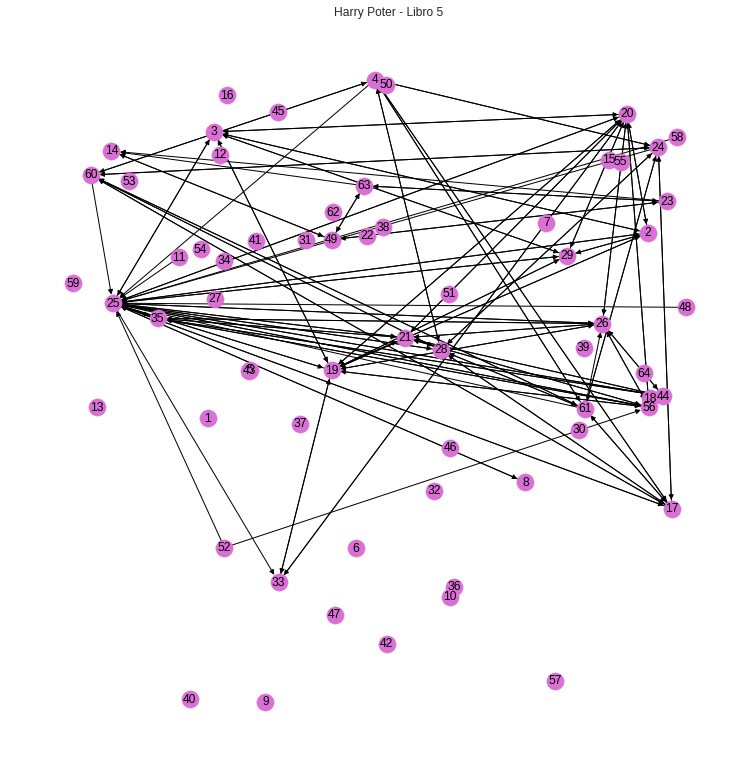

In [0]:
# Dibuja la red asociada al libro.
plt.figure(figsize=(10,10))
nx.draw_random(book5network, with_labels=True, node_color='orchid')
plt.title('Harry Poter - Libro 5')
plt.show()

In [0]:
### Identifica los nodos pertenecientes a cada casa.

# Lectura de todas las posibles casas en Hogwarts.
houseNamesList = list(nodesHarry.HouseName.unique())

# Inicializaar los contadores asociados a los subgrafos.
nodesInAHouse = {}
totalNodesInAHouse = {}

for house in houseNamesList:
  nodesInAHouse[house] = []
  totalNodesInAHouse[house] = 0

# Itera para agregar los nodos a sus casas.
for n in book5network.nodes:
  for house in houseNamesList:
    if book5network.nodes[n]['HouseName']==house: 
      nodesInAHouse[house].append(n)
      totalNodesInAHouse[house] += 1
    

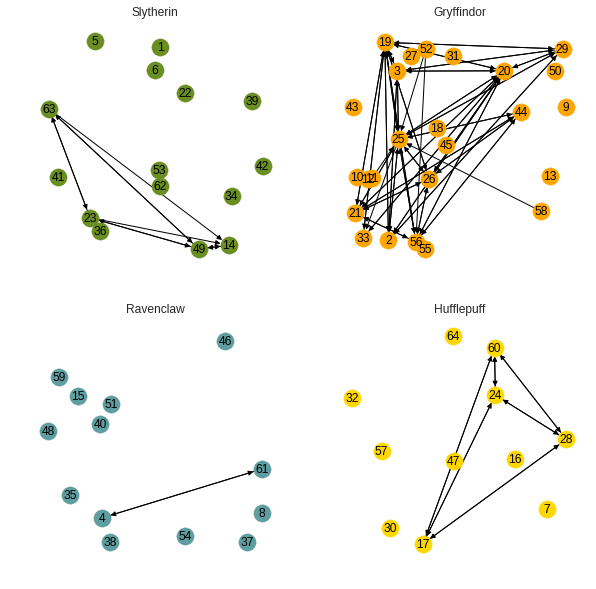

In [0]:
#### Crear subgrafos asociados a cada casa.

houseSubgraph = {}

# Construye los subgrafo de cada casa.
for house in houseNamesList:
  houseSubgraph[house] = book5network.subgraph(nodesInAHouse[house])
  
# Dibuja los subgrafos de cada casa .

subgraphPlot=plt.figure(figsize=(10,10))

# Define colors to graph.


houseColor = { 'Slytherin': 'olivedrab','Gryffindor': 'orange', 'Ravenclaw': 'cadetblue', 'Hufflepuff': 'gold' }
# Iteracion sobre casas.
i=1
for house in houseNamesList:
  plt.subplot(2,2,i)
  nx.draw_random(houseSubgraph[house],node_color=houseColor[house],with_labels=True)
  plt.title(house)
  i+=1

####B. Encontrar a los 5 personajes más conectados de la red por casa ¿Qué se puede interpretar del rol de estos personajes en la red?

In [0]:
#### Encuentra los 5 personajes con mayor Degree en cada subgrafo. 

for house in houseNamesList:
  
  print('\n  En la casa ----> ', house, ' los 5 personajes mas conectados son: \n ')
  
  houseDegrees = dict(houseSubgraph[house].degree())
  fiveMoreConnected =  sorted(houseDegrees,key=houseDegrees.get,reverse=True)[:5]
  
  # Imprime los nombres asociados a los 5 personajes mas conectados. 
  
  for n in fiveMoreConnected:
    # Obtiene el nombre del personaje en el subgrafo.
    charName = houseSubgraph[house].node[n]['Name']
    print('   * ',charName, ' -- degree : ', houseDegrees[n])


  En la casa ---->  Slytherin  los 5 personajes mas conectados son: 
 
   *  Pansy Parkinson  -- degree :  6
   *  Gregory Goyle  -- degree :  5
   *  Vincent Crabbe  -- degree :  5
   *  Draco Malfoy  -- degree :  4
   *  Adrian Pucey  -- degree :  0

  En la casa ---->  Gryffindor  los 5 personajes mas conectados son: 
 
   *  Harry James Potter  -- degree :  22
   *  Fred Weasley  -- degree :  18
   *  George Weasley  -- degree :  18
   *  Ronald Weasley  -- degree :  13
   *  Ginny Weasley  -- degree :  12

  En la casa ---->  Ravenclaw  los 5 personajes mas conectados son: 
 
   *  Anthony Goldstein  -- degree :  2
   *  Terry Boot  -- degree :  2
   *  Luna Lovegood  -- degree :  0
   *  Mandy Brocklehurst  -- degree :  0
   *  Marcus Belby  -- degree :  0

  En la casa ---->  Hufflepuff  los 5 personajes mas conectados son: 
 
   *  Susan Bones  -- degree :  6
   *  Ernie Macmillan  -- degree :  6
   *  Hannah Abbott  -- degree :  6
   *  Justin Finch-Fletchley  -- degree :  6


Para encontrar a los 5 personajes más conectados de la red por casa se calculó la centralidad de grado (número total de conexiones que entran y salen de un nodo a sus nodos adyacentes) de cada personaje y, se escogieron los 5 personajes que tenían el valor más alto. Así, dados los resultados anteriores, es posible decir que en las casa Slytherin los personajes más conectados son Pansy Parkinson, Gregory Goyle, Vincent Crabbe y Draco Malfoy. De igual forma, para la casa Ravenclaw los personajes que tienen más centralidad de grado son Anthony Goldstein y Terry Boot. Ahora bien, los personajes más conectados en la casa Hufflepuff son Susan Bones, Ernie Macmillan, Hannah Abbott y  Justin Finch-Fletchley  con una centralidad de grado de 6 cada uno. Finalmente, en la casa Gryffindor sí se pueden encontrar los 5 personajes más conectados que son, en orden decendente, Harry James Potter, Fred Weasley, George Weasley, Ronald Weasley y Ginny Weasley.  De esta manera, teniendo en cuenta que se estudia una red social, los personajes que tienen una centralidad de grado alta pueden tener más influencia, más acceso a la información o más prestigio que aquellos que tienen menos conexiones (Newman, 2009). Esto indica que en esta red social las personas que cuentan con un mayor alto grado de centralidad tienen más influencia o prestigio. Por lo tanto, el rol de estos personajes en la red es ser focos de información y atención para toda la casa, ya que tienen el mayor número de conexiones y a través de estas pueden llegar a todos los personajes que pertenecen a cada casa en Hogwarts. 

####C. Encontrar la casa más densamente conectada (medida como la densidad del subgrafo inducido por cada casa). ¿Qué se puede interpretar acerca de la estructura de esta casa con respecto a las demás?

In [0]:
### Encuentra las densidades de las casas. 

print('Las densidades de las casas en Hogwarts son:\n')

# Itera sobre las casas y calcula la densidad inducida.
for house in houseNamesList:
  
  houseDensity = nx. density(houseSubgraph[house])
  
  print(house, ' -- > ', houseDensity)

Las densidades de las casas en Hogwarts son:

Slytherin  -- >  0.047619047619047616
Gryffindor  -- >  0.11833333333333333
Ravenclaw  -- >  0.01282051282051282
Hufflepuff  -- >  0.10909090909090909


La casa más densamente conectada se encontró como aquella que tenía el mayor valor asociado a la propiedad densidad característica de los grafos. Dicha propiedad es la proporción del número de lazos presentes en la red sobre el número máximo posible, lo cual indica qué tan cerca está la red de estar totalmente conectada. Así, observando los resultados anteriores, la casa más densamente conectada es Gryffindor ya que tiene una densidad de 0.12 en comparación con las otras casas. De esta manera, la estructura de Gryffindor es más compacta y su número de conexiones se acerca más al número de conexiones totales que se tendría si todos los nodos estuvieran conectados. A pesar de ello, no es un valor significativo ya que es el 11.83% del total de conexiones que podría tener esta red. Sin embargo, es mejor que la conexión que tienen las otras casas con una densidad menor al 10%.

####D. Encontrar la casa con más conexiones con otras casas. ¿Qué se puede interpretar acerca del rol de esta casa en Hogwarts?

In [0]:
### Cuenta las conexiones totales que tienen los nodos de una casa con nodos externos 

# Cuenta por cada casa las conexiones totales con otra casa.

externalLinks={}
for house in houseNamesList:
  
  # Inicializa el conteo de vecinos externos
  externalLinks[house]=0
  
  print('LOS NODOS DE LA CASA: ', house, ' son ', nodesInAHouse[house])
  
  # Itera sobre los nodos de esa casa.
  for n in nodesInAHouse[house]:
    
    # Encuentra todos los vecinos del nodo.
    nNeighbors = list(book5network.neighbors(n))
        
    print(' nodo: ',n , '-- vecinos: ', nNeighbors)
    
    # Itera sobre los vecinos.
    for m in nNeighbors:
      
      if m not in nodesInAHouse[house]:
        
        externalLinks[house]+=1


LOS NODOS DE LA CASA:  Slytherin  son  [1, 5, 6, 14, 22, 23, 34, 36, 39, 41, 42, 49, 53, 62, 63]
 nodo:  1 -- vecinos:  []
 nodo:  5 -- vecinos:  []
 nodo:  6 -- vecinos:  []
 nodo:  14 -- vecinos:  [49]
 nodo:  22 -- vecinos:  []
 nodo:  23 -- vecinos:  [14, 49, 63]
 nodo:  34 -- vecinos:  []
 nodo:  36 -- vecinos:  []
 nodo:  39 -- vecinos:  []
 nodo:  41 -- vecinos:  []
 nodo:  42 -- vecinos:  []
 nodo:  49 -- vecinos:  [14, 23, 63]
 nodo:  53 -- vecinos:  []
 nodo:  62 -- vecinos:  []
 nodo:  63 -- vecinos:  [14, 23, 49]
LOS NODOS DE LA CASA:  Gryffindor  son  [2, 3, 9, 10, 11, 12, 13, 18, 19, 20, 21, 25, 26, 27, 29, 31, 33, 43, 44, 45, 50, 52, 55, 56, 58]
 nodo:  2 -- vecinos:  [3, 19, 20, 25, 29]
 nodo:  3 -- vecinos:  [2, 19, 20, 25, 29]
 nodo:  9 -- vecinos:  []
 nodo:  10 -- vecinos:  []
 nodo:  11 -- vecinos:  [25]
 nodo:  12 -- vecinos:  []
 nodo:  13 -- vecinos:  []
 nodo:  18 -- vecinos:  []
 nodo:  19 -- vecinos:  [2, 3, 20, 21, 25, 26, 29, 33, 56]
 nodo:  20 -- vecinos: 

In [0]:
print('Las conexiones externas de cada casa son: \n')
externalLinks

Las conexiones externas de cada casa son: 



{'Gryffindor': 8, 'Hufflepuff': 12, 'Ravenclaw': 18, 'Slytherin': 0}

La casa con más conexiones con otras casas se calcula contando el número de vecinos de cada nodo que se conecta con otra casa. Así, se encontró que la casa más conectada a otras es Ravenclaw seguida de Hufflepuff y Gryffindor. Esto indica que Ravenclaw es central dentro de toda la red de Hogwarts ya que tiene mayor número de conexiones con Hufflepuff y Gryffindor. Es decir, es un foco de información o prestigio para las otras casas. Dado lo anterior, es importante mencionar que este procedimiento es equivalente a encontrar la centralidad de grado de salida de cada casa, es decir, el número de conexiones que salen de cada nodo a los nodos de otras casas. Finalmente, Slytherin es la única casa que no tiene conexiones con las otras y, por tanto, se puede considerar un nodo aislado dentro de la red de Hogwarts.

#### E. Encontrar el personaje de cada casa principal que en promedio se encuentra más cerca a los demás personajes de la red. ¿Cuál es una posible explicación de la posición de estos personajes?

In [0]:
### Encuentra el personaje con mayor closeness centrality. 

print('El personaje mas conectado de la casa es: \n ')
for house in houseNamesList:
  houseCloseness = dict(nx.closeness_centrality(houseSubgraph[house]))
  firstMoreClose =  sorted(houseCloseness,key=houseCloseness.get,reverse=True)[0]
  
  name = houseSubgraph[house].node[firstMoreClose]['Name']
  print( house, ' ---> ', name, ' con closeness centrality de ',houseCloseness[firstMoreClose])

  
print('\n * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.')

El personaje mas conectado de la casa es: 
 
Slytherin  --->  Draco Malfoy  con closeness centrality de  0.21428571428571427
Gryffindor  --->  Harry James Potter  con closeness centrality de  0.5029761904761905
Ravenclaw  --->  Anthony Goldstein  con closeness centrality de  0.08333333333333333
Hufflepuff  --->  Susan Bones  con closeness centrality de  0.3

 * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.


El personaje de cada casa principal que en promedio se encuentra más cerca a los demás personajes de la red se encontró utilizando como medida de centralidad la cercanía o closeness centrality. La cual, es el promedio de las distancias más cortas desde un personaje hacia todos los demás. En este caso, el personaje que tiene mayor cercanía a todos los demás en  Gryffindor es Harry James Potter, en Slytherin Draco Malfoy, para Ravenclaw es Anthony Goldstein y, en Hufflepuff es Susan Bones. La posición de estos personajes indica que se encuentran en mejores condiciones para influir en toda la red más rápidamente, que se comportan como un buenos emisores de información y que son más accesibles a la red desde cualquier nodo (Disney A., 2014).

####F. Encontrar a los 5 personajes que se encuentran más veces dentro del camino más corto entre todos los nodos de la red. ¿Qué puede suceder con la topología de la red si Voldemort asesinara a estos personajes?


In [0]:
### Encuentra el personaje con mayor betweeness

print('El personaje mas conectado de la casa es: \n ')
for house in houseNamesList:
  houseBetweeness = dict(nx.betweenness_centrality(houseSubgraph[house],normalized = True))
  firstMoreClose =  sorted(houseBetweeness,key=houseBetweeness.get,reverse=True)[0]
  
  
  name = houseSubgraph[house].node[firstMoreClose]['Name']
  print( house, ' ---> ', name, ' con betweeness centrality de ',houseBetweeness[firstMoreClose])

print('\n * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.')

El personaje mas conectado de la casa es: 
 
Slytherin  --->  Pansy Parkinson  con betweeness centrality de  0.01098901098901099
Gryffindor  --->  Harry James Potter  con betweeness centrality de  0.07744565217391304
Ravenclaw  --->  Luna Lovegood  con betweeness centrality de  0.0
Hufflepuff  --->  Leanne  con betweeness centrality de  0.0

 * Nota: Si no hay personajes conectados en la casa se toma el primer nodo asociado a la casa.


Los 5 personajes que se encuentran más veces dentro del camino más corto entre todos los nodos de la red se encontraron con la medida de centralidad intermediación o betweenness centrality. Esta, es la frecuencia con la que un nodo aparece en el camino más corto entre todos los pares de nodos de la red. Es decir, muestra qué nodos actúan como 'puentes' entre nodos en una red (Disney A., 2014). Así pues, con los resultados encontrados se puede decir que esta medida de centralidad es mayor para los personajes Harry James Potter de la casa Gryffindor y Pansy Parkinson de la casa Slytherin, lo cual los convierte en personas que influyen mucho en el flujo de información y unión en el sistema. Por tanto, si Voldemort asesinara a estos personajes, la topología de la red entendida como el mapa físico o lógico de una red para intercambiar datos se vería muy afectada, ya que no están los principales personajes más influyentes dentro de la red al ser los que tiene más acceso a todos los demás. De igual forma, la estructura de la red cambiaría considerablemente en cuanto a la velocidad del flujo de información y la accesibilidad a varios personajes de la red.

#### G. Encontrar la probabilidad de que los amigos de un personaje sean también amigos entre sí. ¿Qué puede inferir de las relaciones de amistad de los personajes de Harry Potter?

In [0]:
# Encontramos la transitividad asociada a cada personaje.
characterClustering = nx.clustering(book5network)

for n in book5network.nodes():
  character = book5network.node[n]['Name']
  print(character, ' -- >',characterClustering[n])

Adrian Pucey  -- > 0
Alicia Spinnet  -- > 1.0
Angelina Johnson  -- > 1.0
Anthony Goldstein  -- > 0.94
Blaise Zabini  -- > 0
C. Warrington  -- > 0
Cedric Diggory  -- > 0
Cho Chang  -- > 0
Colin Creevey  -- > 0
Cormac McLaggen  -- > 0
Dean Thomas  -- > 0
Demelza Robins  -- > 0
Dennis Creevey  -- > 0
Draco Malfoy  -- > 1.0
Eddie Carmichael  -- > 0
Eleanor Branstone  -- > 0
Ernie Macmillan  -- > 0.8666666666666667
Euan Abercrombie  -- > 0
Fred Weasley  -- > 0.5694444444444444
George Weasley  -- > 0.5694444444444444
Ginny Weasley  -- > 0.8095238095238095
Graham Pritchard  -- > 0
Gregory Goyle  -- > 0.875
Hannah Abbott  -- > 0.94
Harry James Potter  -- > 0.23367697594501718
Hermione Granger  -- > 0.7040816326530612
Jimmy Peakes  -- > 0
Justin Finch-Fletchley  -- > 0.8666666666666667
Katie Bell  -- > 1.0
Kevin Whitby  -- > 0
Lavender Brown  -- > 0
Leanne  -- > 0
Lee Jordan  -- > 1.0
Lucian Bole  -- > 0
Luna Lovegood  -- > 1.0
Malcolm Baddock  -- > 0
Mandy Brocklehurst  -- > 0
Marcus Belby  --

Para encontrar la probabilidad de que los amigos de un personaje sean también amigos entre sí, se calculó la medida de transitividad de cada personaje, es decir, la fracción de todos los triángulos (cuando dos nodos que conocen a un tercero se conocen entre ellos) posibles presentes en la red. Así, los resultados anteriores muestran que, para 8 personajes la probabilidad de que sus amigos sean amigos entre ellos es 100%, es decir, tienen una transitividad alta. Por otro lado, la mayoría de los personajes tienen una transitividad mayor al 56%. Y, finalmente, Harry James Potter es el personaje que tiene un menor nivel de transitividad con una probabilidad igual al 23%. Así, se puede inferir que las relaciones de amistad de los personajes de Hogwarts son muy cerradas, ya que la probabilidad de que los amigos de un personaje sean también amigos entre sí es muy alta, lo cual indica que hay muchos triángulos en la red, al menos en las personas que están conectadas entre sí. Ya que los personajes que no tienen conexión alguna con otros tienen una transitividad igual a cero. 

#### H. Encontrar a los 5 personajes más conectados y cuyos vecinos tienen mayor grado. ¿Qué puede inferir de la influencia de estos personajes en la red?

In [0]:
#### Encuentra los 5 personajes con mayor eigenvector centrality. 

print('Los cinco personajes con mayor eigenvector centrality en Harry Poter son: \n ')
eigenvectorCentrality = nx.eigenvector_centrality(book5network,max_iter= 1000,tol=1e-06)

# Escoge los cinco personajes.
fiveMoreConnected =  sorted(eigenvectorCentrality,key=eigenvectorCentrality.get,reverse=True)[:5]

# Imprime la informacion de los personajes.
for n in fiveMoreConnected:
  character = book5network.node[n]['Name']
  print(character, ' -- >',"{:.4f}".format(eigenvectorCentrality[n]))


Los cinco personajes con mayor eigenvector centrality en Harry Poter son: 
 
Harry James Potter  -- > 0.4361
Fred Weasley  -- > 0.3469
George Weasley  -- > 0.3469
Hermione Granger  -- > 0.3072
Ginny Weasley  -- > 0.3013


Los 5 personajes más conectados y cuyos vecinos tienen mayor grado se encontraron por medio de la medida de centralidad de vector propio o eigenvector centrality, la cual es una medida de centralidad que toma en cuenta también la importancia de sus vecinos. Es decir, mide la influencia de un nodo en función del número de enlaces que tiene a otros nodos dentro de la red.  Así, dados los resultados anteriores, Harry James Potter, Fred Weasley, George Weasley, Hermione Granger y Ginny Weasley son los que tienen un mayor nivel de centralidad de vector propio, esto quiere decir que están conectados a muchos nodos que a su vez están bien conectados, y, por lo tanto, son buenos candidatos para difundir información. Los personajes más centrales en este sentido corresponden a centros de grandes grupos cohesivos. Lo cual, quiere decir que tienen una gran influencia dentro de toda la red de personajes de Hogwarts, ya que son nodos que se encuentran conectados a personajes con altos grados de centralidad y, por tanto, cualquier tipo de información puede ser dispersada fácil y rápidamente por ellos.

#### I. Visualicen en Gephi las redes del libro 1 y 5, resaltando a los personajes encontrados en los literales anteriores con distintos colores según la medida de centralidad (teniendo en cuenta cada medida calculada en los literales anteriores). Especifique los casos en que un personaje aparezca con mayor valor en varias medidas.